In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# Load your dataset
df = pd.read_csv('tourism.csv')

# Explore the dataset
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0


In [3]:
df.describe

<bound method NDFrame.describe of         UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0      1000001           Yes                           307.0  iOS and Android   
1      1000002            No                           367.0              iOS   
2      1000003           Yes                           277.0  iOS and Android   
3      1000004            No                           247.0              iOS   
4      1000005            No                           202.0  iOS and Android   
...        ...           ...                             ...              ...   
11755  1011756            No                           279.0           Laptop   
11756  1011757            No                           305.0              Tab   
11757  1011758            No                           214.0              Tab   
11758  1011759            No                           382.0           Laptop   
11759  1011760            No                           270.0              T

In [4]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        1
Daily_Avg_mins_spend_on_traveling_page            1
dtype: int64

In [5]:
# Replace null values with mean for numeric columns
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Replace null values with mode for non-numeric columns
non_numeric_cols = df.select_dtypes(exclude='number').columns
df[non_numeric_cols] = df[non_numeric_cols].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))

In [6]:
df.isnull().sum()

UserID                                          0
Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [7]:
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0


In [8]:
df.columns

Index(['UserID', 'Taken_product', 'Yearly_avg_view_on_travel_page',
       'preferred_device', 'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [9]:
df.dtypes

UserID                                            int64
Taken_product                                    object
Yearly_avg_view_on_travel_page                  float64
preferred_device                                 object
total_likes_on_outstation_checkin_given         float64
yearly_avg_Outstation_checkins                   object
member_in_family                                 object
preferred_location_type                          object
Yearly_avg_comment_on_travel_page               float64
total_likes_on_outofstation_checkin_received      int64
week_since_last_outstation_checkin                int64
following_company_page                           object
montly_avg_comment_on_company_page                int64
working_flag                                     object
travelling_network_rating                         int64
Adult_flag                                      float64
Daily_Avg_mins_spend_on_traveling_page          float64
dtype: object

In [10]:
def perform_rfm_analysis(df):
    # Columns in your dataset
    rfm_columns = ['UserID', 'Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given',
                   'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received',
                   'week_since_last_outstation_checkin', 'montly_avg_comment_on_company_page',
                   'travelling_network_rating', 'Daily_Avg_mins_spend_on_traveling_page']

    # Select relevant columns for RFM analysis
    rfm_df = df[rfm_columns].copy()

    # Perform Recency (R) analysis
    # Assuming 'week_since_last_outstation_checkin' represents recency
    rfm_df['Recency'] = rfm_df['week_since_last_outstation_checkin']

    # Perform Frequency (F) analysis
    # Assuming 'total_likes_on_outstation_checkin_given' represents frequency
    rfm_df['Frequency'] = rfm_df['total_likes_on_outstation_checkin_given']

    # Perform Monetary Value (M) analysis
    # Assuming 'Yearly_avg_comment_on_travel_page' represents monetary value
    rfm_df['Monetary'] = rfm_df['Yearly_avg_comment_on_travel_page']

    # Drop unnecessary columns
    rfm_df = rfm_df[['UserID', 'Recency', 'Frequency', 'Monetary']]

    # Fill any missing values with appropriate strategy (mean, median, etc.)
    rfm_df.fillna(rfm_df.mean(), inplace=True)

    # Use KMeans clustering to create clusters
    kmeans = KMeans(n_clusters=10, random_state=42)
    rfm_df['Cluster'] = kmeans.fit_predict(rfm_df[['Recency', 'Frequency', 'Monetary']])

    return rfm_df[['UserID', 'Cluster', 'Recency', 'Frequency', 'Monetary']]

In [11]:
# Perform RFM analysis on a subset (e.g., 70% of data)
# Add cluster column to the dataset

rfm_df = perform_rfm_analysis(df)
df['cluster'] = rfm_df['Cluster']

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,cluster
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0,2
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0,1
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0,4
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0,4
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0,3


In [13]:
df['cluster'].unique()

array([2, 1, 4, 3, 5, 9, 0, 7, 8, 6])

In [14]:
df['cluster'].isnull().sum()

0

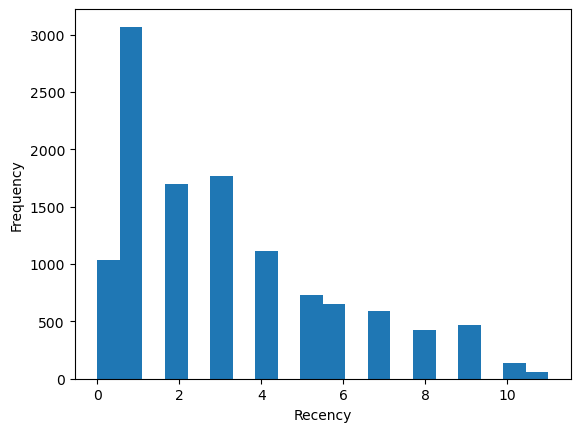

In [15]:
import matplotlib.pyplot as plt

# Example for 'Recency'
plt.hist(rfm_df['Recency'], bins=20)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


In [16]:
# Assuming rfm_df is your DataFrame containing the 'Cluster' column
df.dropna(subset=['cluster'], inplace=True)

In [17]:
df['cluster'].isnull().sum()

0

In [18]:
df.isnull().sum()

UserID                                          0
Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
cluster                                         0
dtype: int64

Now all the clustering thing is over with RFM analysis I will corrupt the reamining data and predict the clustering using RFM

In [21]:
# encoding everything because i want to see correlation and corrupt those values

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to each non-numeric column
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [22]:
df.dtypes

UserID                                            int64
Taken_product                                     int32
Yearly_avg_view_on_travel_page                  float64
preferred_device                                  int32
total_likes_on_outstation_checkin_given         float64
yearly_avg_Outstation_checkins                    int32
member_in_family                                  int32
preferred_location_type                           int32
Yearly_avg_comment_on_travel_page               float64
total_likes_on_outofstation_checkin_received      int64
week_since_last_outstation_checkin                int64
following_company_page                            int32
montly_avg_comment_on_company_page                int64
working_flag                                      int32
travelling_network_rating                         int64
Adult_flag                                      float64
Daily_Avg_mins_spend_on_traveling_page          float64
cluster                                         

In [23]:
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,cluster
0,1000001,1,307.0,9,38570.0,1,2,3,94.0,5993,8,3,11,1,1,0.0,8.0,2
1,1000002,0,367.0,8,9765.0,1,0,3,61.0,5130,1,2,23,2,4,1.0,10.0,1
2,1000003,1,277.0,9,48055.0,1,2,10,92.0,2090,6,3,15,1,2,0.0,7.0,4
3,1000004,0,247.0,8,48720.0,1,4,3,56.0,2909,1,3,11,1,3,0.0,8.0,4
4,1000005,0,202.0,9,20685.0,1,0,7,40.0,3468,9,2,12,1,4,1.0,6.0,3


In [30]:
corr = df.corr()
corr

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,cluster
UserID,1.000000,-0.001296,0.078066,-0.379909,-0.012021,0.465902,-0.000539,-0.181548,0.227994,0.001199,0.085019,0.008520,0.046885,-0.002176,-0.009505,0.007670,0.115200,0.041658
Taken_product,-0.001296,1.000000,-0.150173,0.003718,-0.054194,0.026256,-0.031549,0.027286,-0.005465,-0.159824,0.044725,0.241793,0.000618,0.002991,-0.045993,-0.137185,-0.143237,-0.042417
Yearly_avg_view_on_travel_page,0.078066,-0.150173,1.000000,-0.012307,0.010172,0.044698,0.204595,-0.040580,0.040835,0.485310,0.279453,0.030161,-0.009610,0.005611,0.055429,0.036837,0.581046,0.008221
preferred_device,-0.379909,0.003718,-0.012307,1.000000,0.000903,-0.237178,0.001293,0.111405,-0.046006,0.024636,0.012642,0.007241,0.016334,-0.020400,-0.027193,-0.013908,0.025174,0.007501
total_likes_on_outstation_checkin_given,-0.012021,-0.054194,0.010172,0.000903,1.000000,-0.009277,-0.012421,0.004877,0.011942,0.012266,0.034826,0.014891,0.012448,0.000075,0.009483,0.039272,0.008838,0.025035
yearly_avg_Outstation_checkins,0.465902,0.026256,0.044698,-0.237178,-0.009277,1.000000,-0.011251,-0.111519,0.072667,-0.004082,0.001652,0.009868,-0.017462,0.013973,0.010233,-0.003405,0.011443,0.032276
member_in_family,-0.000539,-0.031549,0.204595,0.001293,-0.012421,-0.011251,1.000000,-0.005929,0.006792,0.093292,0.123889,-0.022966,-0.010313,-0.026308,-0.008234,0.020866,0.127830,-0.007580
preferred_location_type,-0.181548,0.027286,-0.040580,0.111405,0.004877,-0.111519,-0.005929,1.000000,-0.066658,-0.007002,-0.002418,0.010528,0.007607,-0.006278,0.009636,-0.000823,-0.001594,-0.004556
Yearly_avg_comment_on_travel_page,0.227994,-0.005465,0.040835,-0.046006,0.011942,0.072667,0.006792,-0.066658,1.000000,-0.013865,0.059043,-0.007805,0.019184,-0.004627,0.006555,0.043870,0.059967,-0.018586
total_likes_on_outofstation_checkin_received,0.001199,-0.159824,0.485310,0.024636,0.012266,-0.004082,0.093292,-0.007002,-0.013865,1.000000,0.144058,0.008658,-0.005130,-0.016964,0.025575,0.005379,0.673397,0.010456


<Axes: >

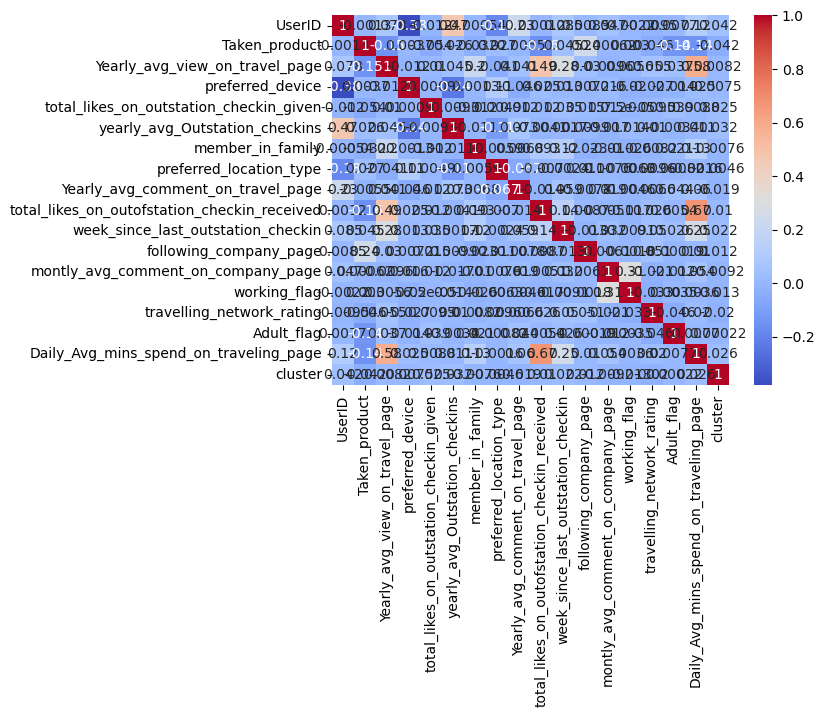

In [29]:
sns.heatmap(corr, cmap='coolwarm', annot=True)

'Taken_product', 'total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins'

In [31]:
# first we will train on the first 70%

X = df.drop(['cluster'], axis=1)
y = df['cluster']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Step 5: Impute Missing Values only on the 30% of data
# Create missing values in a subset (e.g., 30% of data)
df_missing = df.sample(frac=0.3)

# Define features with missing values
features_with_missing = ['Taken_product', 'total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins']

# Create a pipeline to handle missing values and predict clusters
model_pipeline = Pipeline(steps=[
    ('imputer', ColumnTransformer(transformers=[
        ('missing', SimpleImputer(strategy='mean'), features_with_missing)
    ])),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

We create a subset (df_missing) by randomly sampling 30% of the data from the original dataset.
The features with missing values are identified and stored in features_with_missing.
A pipeline is created to handle missing values using SimpleImputer with the mean strategy, and it includes a RandomForestClassifier.
The pipeline is trained on the original training data (X_train, y_train).

In [35]:
# Train the model with the data having missing values
model_pipeline.fit(X_train, y_train)

# Step 6: Evaluate Model
# Predict clusters for the test set and evaluate the model's accuracy
X_missing = df_missing.drop(['cluster'], axis=1)
y_missing_true = df_missing['cluster']

# Impute missing values using the trained pipeline
X_missing_imputed = model_pipeline.named_steps['imputer'].transform(X_missing)

# Predict clusters for the imputed data
y_missing_pred = model_pipeline.named_steps['classifier'].predict(X_missing_imputed)

# Evaluate accuracy
accuracy_missing = accuracy_score(y_missing_true, y_missing_pred)
print(f'Model Accuracy on Data with Missing Values: {accuracy_missing}')

Model Accuracy on Data with Missing Values: 0.9997165532879818


y_missing_true represents the true cluster labels for the subset of data with missing values.
y_missing_pred represents the predicted cluster labels for the imputed data using the trained model.
The accuracy_score function from sklearn.metrics is then used to compare these true and predicted labels and calculate the accuracy. The accuracy score is the ratio of correctly predicted instances to the total number of instances.

In [39]:
df['cluster'].isnull().sum()

0

In [41]:
df['cluster'].unique()

array([2, 1, 4, 3, 5, 9, 0, 7, 8, 6])

### Targeted Marketing

In [43]:
# Create a new column 'package_category' based on cluster assignment or other criteria
df['package_category'] = 'Unknown'  # Default value

# Define criteria for each package category based on your insights
economy_criteria = df['cluster'].isin([0, 1, 2])
medium_criteria = df['cluster'].isin([3, 4, 5, 6])
luxury_criteria = df['cluster'].isin([7, 8, 9])  # Assuming three clusters

# Assign package categories based on criteria
df.loc[economy_criteria, 'package_category'] = 'Economy'
df.loc[medium_criteria, 'package_category'] = 'Medium'
df.loc[luxury_criteria, 'package_category'] = 'Luxury'

# Print the count of customers in each package category
print("Package Category Counts:")
print(df['package_category'].value_counts())


Package Category Counts:
package_category
Medium     3981
Economy    3953
Luxury     3826
Name: count, dtype: int64


In [45]:
import random

# Define packages for each category
economy_packages = ['Staycation', 'Budget Hotels', 'Weekend Getaway']
medium_packages = ['City Tour Package', 'Family Retreat', 'Adventure Package']
luxury_packages = ['Luxury Spa Retreat', '5-Star Resort Experience', 'Exclusive Cruise']

# Create a new column 'selected_package' to store the assigned package for each customer
df['selected_package'] = 'Unknown'

# Function to randomly assign a package based on category
def assign_package(row):
    if row['package_category'] == 'Economy':
        return random.choice(economy_packages)
    elif row['package_category'] == 'Medium':
        return random.choice(medium_packages)
    elif row['package_category'] == 'Luxury':
        return random.choice(luxury_packages)
    else:
        return 'Unknown'

# Apply the function to assign packages
df['selected_package'] = df.apply(assign_package, axis=1)

# Print the selected packages for each category
print("Selected Packages:")
print(df[['package_category', 'selected_package']])

Selected Packages:
      package_category          selected_package
0              Economy             Budget Hotels
1              Economy           Weekend Getaway
2               Medium         Adventure Package
3               Medium         City Tour Package
4               Medium         Adventure Package
...                ...                       ...
11755          Economy           Weekend Getaway
11756           Medium         City Tour Package
11757           Luxury  5-Star Resort Experience
11758           Medium         Adventure Package
11759           Medium         Adventure Package

[11760 rows x 2 columns]


In [46]:
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,cluster,package_category,selected_package
0,1000001,1,307.0,9,38570.0,1,2,3,94.0,5993,8,3,11,1,1,0.0,8.0,2,Economy,Budget Hotels
1,1000002,0,367.0,8,9765.0,1,0,3,61.0,5130,1,2,23,2,4,1.0,10.0,1,Economy,Weekend Getaway
2,1000003,1,277.0,9,48055.0,1,2,10,92.0,2090,6,3,15,1,2,0.0,7.0,4,Medium,Adventure Package
3,1000004,0,247.0,8,48720.0,1,4,3,56.0,2909,1,3,11,1,3,0.0,8.0,4,Medium,City Tour Package
4,1000005,0,202.0,9,20685.0,1,0,7,40.0,3468,9,2,12,1,4,1.0,6.0,3,Medium,Adventure Package
